In [1]:
%matplotlib inline
import phate
import numpy as np
import pandas as pd
import sklearn.manifold
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Embedding DLA fractal tree

In [2]:
#generate DLA tree
M, C = phate.tree.gen_dla(n_dim = 100, n_branch = 20, branch_length = 100, 
                          n_drop = 0, rand_multiplier = 2, seed=37, sigma = 4)

#instantiate phate_operator
phate_operator = phate.PHATE(n_components=2, a=10, k=5, t=30, mds='classic', 
                             knn_dist='euclidean', mds_dist='euclidean', njobs=-2)

#run phate with classic MDS
Y_cmds = phate_operator.fit_transform(M)

#run phate with metric MDS
phate_operator.reset_mds(mds="metric") #change the MDS embedding without recalculating diffusion potential
Y_mmds = phate_operator.fit_transform(M)

#run phate with nonmetric MDS
phate_operator.reset_mds(mds="nonmetric")
Y_nmmds = phate_operator.fit_transform(M)

pca = phate.preprocessing.pca_reduce(M, n_components=2)
tsne = sklearn.manifold.TSNE().fit_transform(M)

Bulding kNN graph and diffusion operator...
Built graph and diffusion operator in 1.61 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 2.29 seconds.
Embedding data using classic MDS...
Embedded data in 6.67 seconds.
Finished PHATE embedding in 10.57 seconds.

Using precomputed diffusion operator...
Using precomputed diffusion potential...
Embedding data using metric MDS...
Embedded data in 33.07 seconds.
Finished PHATE embedding in 33.07 seconds.

Using precomputed diffusion operator...
Using precomputed diffusion potential...
Embedding data using nonmetric MDS...
Embedded data in 874.92 seconds.
Finished PHATE embedding in 874.92 seconds.

Running PCA to 2 dimensions using sparse PCA...


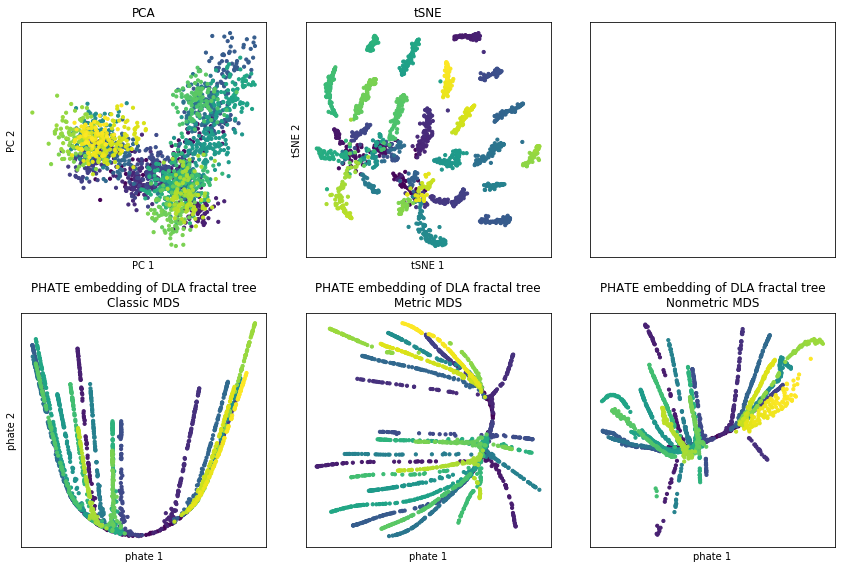

In [3]:
f, axes = plt.subplots(2,3)

f.set_size_inches(12,8)
plt.setp(axes, xticks=[], xticklabels=[], yticks=[])

ax1, ax2, ax3, ax4, ax5, ax6 = axes.ravel()

#plotting PCA
ax1.scatter(pca[:,0], pca[:,1], s=10, c=C)
ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.set_title("PCA")

#plotting tSNE
ax2.scatter(tsne[:,0], tsne[:,1], s=10, c=C)
ax2.set_xlabel("tSNE 1")
ax2.set_ylabel("tSNE 2")
ax2.set_title("tSNE")

#plotting PHATE - classic MDS
ax4.scatter(Y_cmds[:,0], Y_cmds[:, 1], s=10, c=C)
ax4.set_xlabel("phate 1")
ax4.set_ylabel("phate 2")
ax4.set_title("PHATE embedding of DLA fractal tree\nClassic MDS")

#plotting PHATE - metric MDS
ax5.scatter(Y_mmds[:,0], Y_mmds[:, 1], s=10, c=C)
ax5.set_xlabel("phate 1")
ax5.set_title("PHATE embedding of DLA fractal tree\nMetric MDS")

#plotting PHATE - nonmetric MDS
ax6.scatter(Y_nmmds[:,0], Y_nmmds[:, 1], s=10, c=C)
ax6.set_xlabel("phate 1")
ax6.set_title("PHATE embedding of DLA fractal tree\nNonmetric MDS")

plt.tight_layout()

### Embedding 2730 BMMSCs from  murine bone marrow
Data from: [Paul F., et al. Transcriptional Heterogeneity and Lineage Commitment in Myeloid Progenitors. Cell. 2015.](https://www.ncbi.nlm.nih.gov/pubmed/26627738)
Raw annotated data can be downloaded from [NCBI GEO - GSE72857](https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE72857)

In [4]:
clusters = pd.read_csv("../../data/MAP.csv", header=None)
clusters.columns = pd.Index(['wells', 'clusters'])
bmmsc = pd.read_csv("../../data/BMMC_myeloid.csv.gz", index_col=0)

C = clusters['clusters'] #using cluster labels from original publication

In [5]:
#library_size_normalize performs L1 normalization on each cell
bmmsc_norm = phate.preprocessing.library_size_normalize(bmmsc)
bmmsc_reduced = phate.preprocessing.pca_reduce(bmmsc_norm, n_components=20)
phate_operator = phate.PHATE(n_components=3, t=40, a=10, k=4, mds='classic', mds_dist='euclidean')
Y_cmds = phate_operator.fit_transform(bmmsc_reduced)

Normalizing library sizes for 2730 cells
Running PCA to 20 dimensions using sparse PCA...
Bulding kNN graph and diffusion operator...
Built graph and diffusion operator in 1.22 seconds.
Calculating diffusion potential...
Calculated diffusion potential in 4.24 seconds.
Embedding data using classic MDS...
Embedded data in 16.25 seconds.
Finished PHATE embedding in 21.70 seconds.



In [6]:
pca = bmmsc_reduced[:,0:2] #first two PCA dimensions
tsne = sklearn.manifold.TSNE().fit_transform(bmmsc_reduced)

#### Plotting

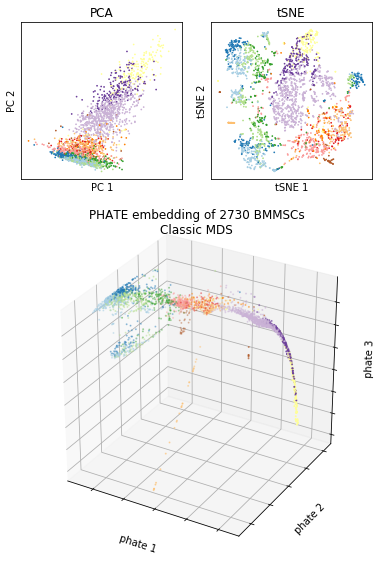

In [7]:
ax1 = plt.subplot2grid((3,3), (0,0), colspan=1)
ax2 = plt.subplot2grid((3,3), (0,1), colspan=1)
ax3 = plt.subplot2grid((3,3), (1,0), colspan=2, rowspan=2, projection='3d')
axes = (ax1, ax2)
plt.setp(axes, xticks=[], xticklabels=[], yticks=[])
plt.setp(ax3, xticklabels=[], yticklabels=[], zticklabels=[])

#plotting PCA
ax1.scatter(pca[:,0], pca[:,1], s=0.5, c=C, cmap="Paired")

ax1.set_xlabel("PC 1")
ax1.set_ylabel("PC 2")
ax1.set_title("PCA")

#plotting tSNE
ax2.scatter(tsne[:,0], tsne[:,1], s=0.5, c=C, cmap="Paired")
ax2.set_xlabel("tSNE 1")
ax2.set_ylabel("tSNE 2")
ax2.set_title("tSNE")

#plotting PHATE - classic MDS
ax3.scatter(Y_cmds[:,0], Y_cmds[:,1], Y_cmds[:,2], s=1, c=C, cmap="Paired")
ax3.set_xlabel("phate 1")
ax3.set_ylabel("phate 2")
ax3.set_zlabel("phate 3")
ax3.set_title("PHATE embedding of 2730 BMMSCs\nClassic MDS")
ax3.set_xlim(min(Y_cmds[:,0])*0.7, max(Y_cmds[:,0])*0.7)

plt.setp(ax3, xticklabels=[], yticklabels=[], zticklabels=[])
plt.gcf().set_size_inches(8,8)
plt.tight_layout()
plt.savefig("bmmsc.png", dpi=100)